In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.pecan_dataport.participant_preprocessing import PecanParticipantPreProcessing
from sklearn.decomposition import PCA
from scipy import stats

In [13]:
pecan_dataset = PecanParticipantPreProcessing('661_test_30_all', 'data/participants_data/1min/',60)

[!] - Trainable dataframe shape - (129086, 28)
[*] Train dataframe shape: (90360, 28)
[*] Validation dataframe shape: (25817, 28)
[*] Test dataframe shape: (12909, 28)


100%|█████████████████████████████████████████████████████████████████████████| 25757/25757 [00:01<00:00, 14075.27it/s]


[!] Train sequence shape: (60, 28)
[!] Test sequence shape: (60, 28)
[!] Val sequence shape: (60, 28)
[!] Len of train, val and test sequence: 90300 25757 12849


In [14]:
pecan_std_df = pecan_dataset.total_df #Dataframe com dados pre-processados normalizados

In [15]:
features_names = [x for x in pecan_std_df.columns if x != "consumption"]
features_values = pecan_std_df[features_names].values
target_values = np.array(pecan_std_df['consumption'])

In [16]:
pca = PCA(n_components = 0.99)
features_pca = pca.fit(pecan_std_df)
loadings = features_pca.components_

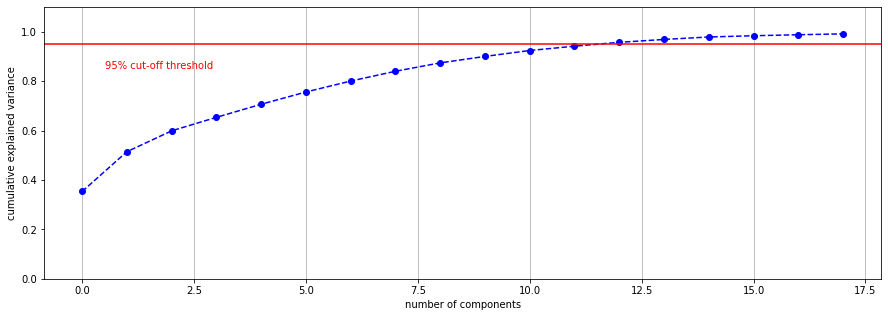

In [17]:
plt.figure(figsize=(15, 5))
plt.ylim(0.0,1.1)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red')
plt.grid(axis='x')

In [18]:
cumVar = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)*100, 
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(pca.explained_variance_ratio_*100, columns=["VarPerc"])
indexes = dict(zip())
pd.concat([expVar, cumVar], axis=1).rename(index={0: "PC1", 1: "PC2"})

,VarPerc,cumVarPerc
PC1,35.336933,35.336933
PC2,16.093659,51.430592
2,8.447793,59.878385
3,5.471469,65.349854
4,5.286701,70.636555
5,4.964985,75.601541
6,4.430126,80.031667
7,3.957401,83.989068
8,3.400837,87.389905
9,2.605802,89.995707


In [19]:
pca_result_df = pd.DataFrame(pca.components_, columns = pecan_std_df.columns)
pca_result_df

,generation,time_hour,time_minute,month,day_of_week,day,week_of_year,consumption_change,consumption,maxtempC,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,-0.007263,-0.015960,0.000130,-0.408948,-0.065876,-0.113048,-0.484551,-1.806070e-05,0.003001,-0.247126,...,-0.230685,-0.031832,-0.102360,-0.145858,-0.013985,0.195413,-0.229256,0.032581,-0.042802,-0.028422
1,-0.184132,-0.053651,0.000219,-0.187485,0.197799,-0.009657,-0.216370,1.431993e-04,0.049661,-0.044698,...,0.006867,0.024440,0.595407,0.329571,0.028836,-0.082342,0.006383,-0.207790,0.033840,0.023525
2,0.169961,0.219429,-0.000363,-0.462867,0.210519,0.151934,-0.434460,-1.557078e-04,-0.040610,0.184940,...,0.206589,-0.001740,-0.254832,-0.049662,-0.024495,-0.116653,0.200133,0.063272,0.213835,-0.002410
3,-0.040034,-0.197988,-0.000341,-0.254000,-0.759327,0.467492,0.064086,-2.404188e-05,-0.010566,0.025248,...,-0.008708,0.063472,0.115191,0.062043,0.035926,0.019198,-0.009312,-0.018267,0.081189,0.052152
4,-0.168914,-0.641559,-0.000128,0.018624,0.294368,-0.061479,-0.049144,3.568968e-04,0.058784,0.100539,...,-0.085724,-0.033661,-0.111106,0.146656,0.005195,0.023473,-0.094261,-0.111829,-0.036700,-0.074096
5,0.056759,0.403630,-0.000973,0.144508,-0.216536,-0.400763,-0.036158,-1.191466e-04,-0.026078,-0.076753,...,0.042413,0.015040,0.164537,-0.085642,0.013639,0.029493,0.046886,0.009223,-0.255774,0.036429
6,0.000794,0.000282,0.999983,0.000039,-0.001181,-0.001114,-0.000431,9.535330e-07,0.005459,0.000369,...,0.000187,0.000056,-0.000284,0.000036,-0.000031,-0.000376,0.000161,0.000113,0.000278,-0.000127
7,-0.255244,0.353345,0.000852,-0.101140,0.287437,0.571876,0.169780,9.964250e-04,0.085521,-0.065700,...,-0.056700,-0.081840,-0.067083,0.103020,0.020872,0.137027,-0.072678,0.044615,-0.506471,-0.124946
8,0.647757,-0.286177,0.001201,-0.038379,0.109165,0.168097,0.037387,-2.911272e-03,-0.193457,-0.069044,...,0.105338,-0.280537,0.265026,-0.247426,0.012375,0.154364,0.096640,-0.130634,-0.310523,-0.113847
9,0.190532,0.026000,0.000944,0.079734,0.309176,0.287069,0.203574,-1.140295e-03,-0.058484,-0.163761,...,-0.096644,0.349874,0.123162,-0.155449,0.030579,0.037014,-0.044604,0.218155,0.414538,0.399823


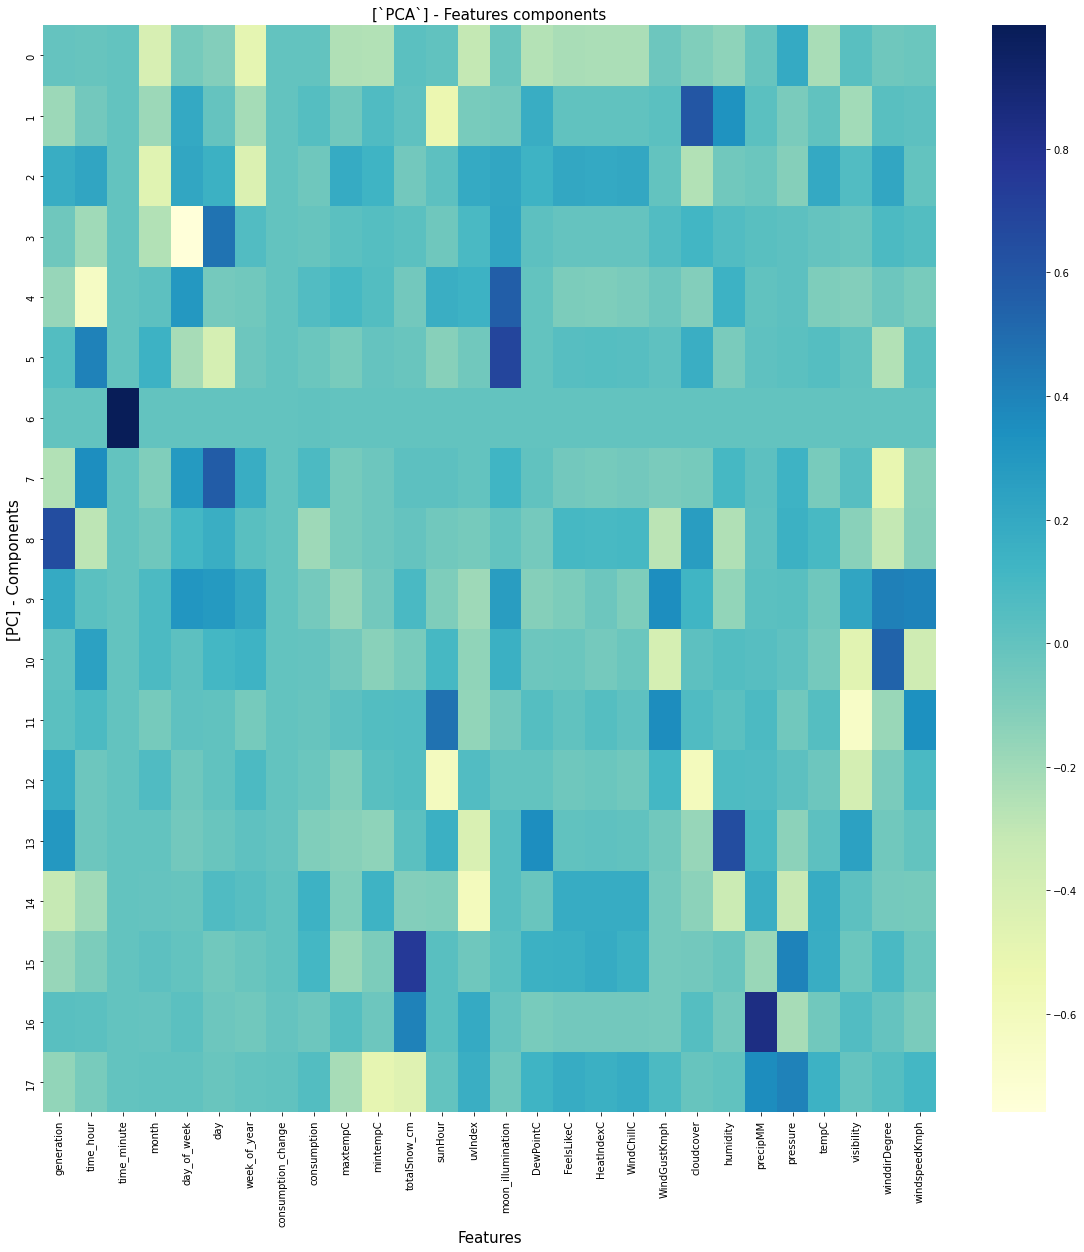

In [20]:

plt.figure(figsize=(20, 20))
plt.title(f'[`PCA`] - Features components', fontsize=15)

ax = sns.heatmap(pca_result_df,  cmap="YlGnBu")
plt.xlabel('Features', fontsize=15)
plt.ylabel('[PC] - Components', fontsize=15)
# plt.savefig(f'etc/imgs/features/feature_importance_PCA_661_test_13.svg', dpi=600, bbox_inches='tight')
plt.show()

In [21]:
most_important

[6, 13, 4, 4, 12, 1, 2, 17, 0, 11, 16, 10, 14, 8, 9]

In [22]:
n_pcs= pca.n_components_ 
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = pecan_std_df.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

np.abs(pca.components_[1])
most_important_names

['week_of_year',
 'cloudcover',
 'month',
 'day_of_week',
 'time_hour',
 'moon_illumination',
 'time_minute',
 'day',
 'generation',
 'winddirDegree',
 'winddirDegree',
 'visibility',
 'sunHour',
 'humidity',
 'uvIndex',
 'totalSnow_cm',
 'precipMM',
 'mintempC']